## Лабораторная работа 4.2.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp
import tikzplotlib as tikz

In [2]:
def csvtotex(input, output, columns=None, rows=[-1], type=None, transp=False):
    df = pd.read_csv(input, sep=",", usecols=columns, quotechar='"', dtype=type)
    df = df[df.index.isin(rows)]
    if transp:
        df = df.transpose()
        pd.DataFrame.to_csv(df, output, sep="&", index=True)
        with open(output, "r") as data:
            content = data.readlines()
        with open(output, "w") as data:
            data.write("\\begin{tabular}{")
            for c in rows: data.write("|l")
            data.write("|l|}")
            data.write("\hline")
            content.pop(0)
            for str in content:
                data.write(str)
                data.write("\\\\")
                data.write("\hline")
            data.write("\end{tabular}")
    else:
        pd.DataFrame.to_csv(df, output, sep="&", index=False)
        with open(output, "r") as data:
            content = data.readlines()
        with open(output, "w") as data:
            data.write("\\begin{tabular}{")
            for c in columns: data.write("|l")
            data.write("|}")
            data.write("\hline")
            for str in content:
                data.write(str)
                data.write("\\\\")
                data.write("\hline")
            data.write("\end{tabular}")
    return df

In [3]:
def print_err(a, a_err):
    print(np.round(a, decimals = 1 + round(abs(np.log10(a_err)))),
    '\pm', np.round(a_err, decimals = 1 + round(abs(np.log10(a_err)))))

In [4]:
def T(n, x):
    return np.cos(n * np.arccos(x))

>#### Характеристики установки

In [5]:
l = 25
lam = 670
del_lam = 100

>#### Калибровка компенсатора

In [6]:
df = csvtotex("../data/data.csv", "../data/table1.tex", (0,1), range(0, 15))
display(df)

,$m$,"$z$, дел"
0,0.0,275.0
1,1.0,311.0
2,2.0,348.0
3,3.0,381.0
4,4.0,419.0
5,5.0,453.0
6,6.0,489.0
7,7.0,529.0
8,-1.0,250.0
9,-2.0,214.0


In [7]:
m = df[df.columns[0]].values
z = df[df.columns[1]].values

In [8]:
def fit1(x, p0, p1):
    return p0 * x + p1

In [9]:
K, err_K = sp.curve_fit(fit1, m, z)
for num, el in enumerate(K):
    print_err(el, err_K[num][num] ** 0.5)

34.63 \pm 0.22
280.8 \pm 0.9


<ErrorbarContainer object of 3 artists>

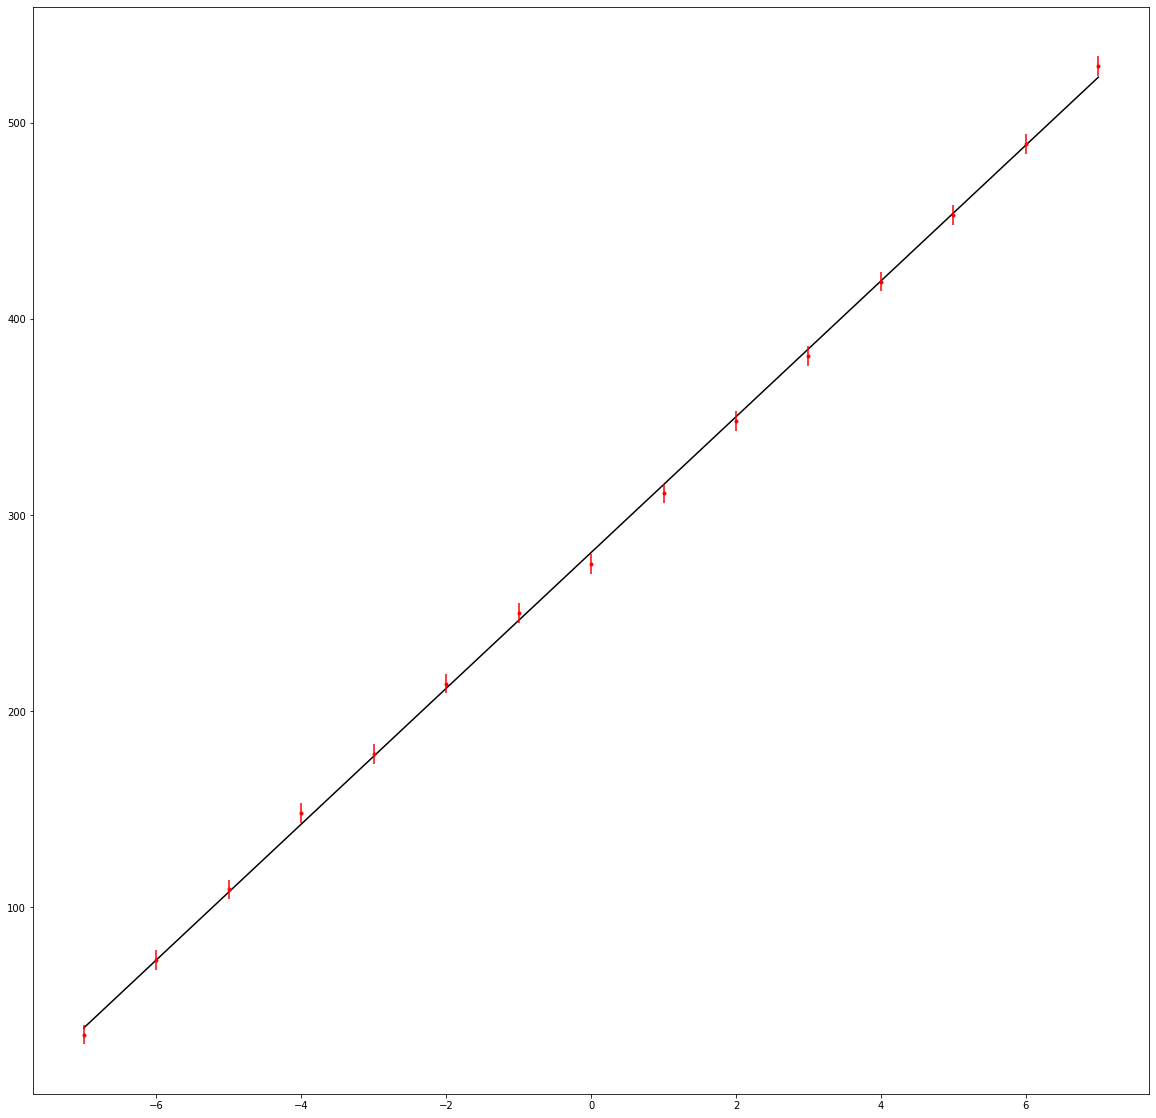

In [10]:
x = np.linspace(m.min(), m.max(), 2)
plt.figure(figsize=(20, 20))
plt.plot(x, K[0] * x + K[1], "black")
plt.errorbar(m, z, yerr=5, fmt='.', color='red')
#tikz.save("plot1.tex")

>#### Зависимость $\Delta n$ от $P$ для воздуха

In [11]:
df1 = csvtotex("../data/data.csv", "../data/table2_1.tex", (3, 4), range(0, 6), transp=True)
df2 = csvtotex("../data/data.csv", "../data/table2_2.tex", (3, 4), range(6, 13), transp=True)
df3 = csvtotex("../data/data.csv", "../data/table2_3.tex", (3, 4), range(13, 20), transp=True)
df = pd.concat([df1, df2, df3], axis=1, join="inner")
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
"$P$, мм вд. c.",-1000.0,-900.0,-800.0,-700.0,-600.0,-500.0,-400.0,-300.0,-200.0,-100.0,0.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0
"$z $, дел",614.0,588.0,521.0,484.0,447.0,411.0,374.0,341.0,309.0,273.0,275.0,196.0,166.0,130.0,104.0,74.0,36.0,3.0,-69.0,-140.0


In [12]:
df = df.transpose()
P = df[df.columns[0]].values
sig_P = 50
z = df[df.columns[1]].values
sig_z = 5
del_n = ((z - K[1]) / K[0]) * lam / l
sig_del_n = np.abs(del_n * (((sig_z ** 2 + err_K[1][1]) ** 0.5 / (z - K[1])) ** 2 + (err_K[0][0] ** 0.5 / K[0]) ** 2) ** 0.5)

In [13]:
df1 = pd.DataFrame({"$\\delta n\\cdot10^{-7}$": np.round(del_n)})
df2 = pd.DataFrame({"$\\sigma_{\\delta n}\\cdot10^{-7}$": np.round(sig_del_n)})
df = pd.concat([df, df1, df2], axis=1, join='inner')
display(df)
pd.DataFrame.to_csv(df, "../data/calculated_n.csv", index=False)
df1 = csvtotex("../data/calculated_n.csv", "../data/table2_1.tex", range(0,4), range(0, 6), transp=True)
df2 = csvtotex("../data/calculated_n.csv", "../data/table2_2.tex", range(0,4), range(6, 13), transp=True)
df3 = csvtotex("../data/calculated_n.csv", "../data/table2_3.tex", range(0,4), range(13, 20), transp=True)

,"$P$, мм вд. c.","$z $, дел",$\delta n\cdot10^{-7}$,$\sigma_{\delta n}\cdot10^{-7}$
0,-1000.0,614.0,258.0,4.0
1,-900.0,588.0,238.0,4.0
2,-800.0,521.0,186.0,4.0
3,-700.0,484.0,157.0,4.0
4,-600.0,447.0,129.0,4.0
5,-500.0,411.0,101.0,4.0
6,-400.0,374.0,72.0,4.0
7,-300.0,341.0,47.0,4.0
8,-200.0,309.0,22.0,4.0
9,-100.0,273.0,-6.0,4.0


In [14]:
def fit2(x, p0):
    return p0 * x

In [15]:
k, err = sp.curve_fit(fit2, P, del_n)
for num, val in enumerate(k):
    print_err(val, err[num][num] ** 0.5)

-0.28 \pm 0.014


<ErrorbarContainer object of 3 artists>

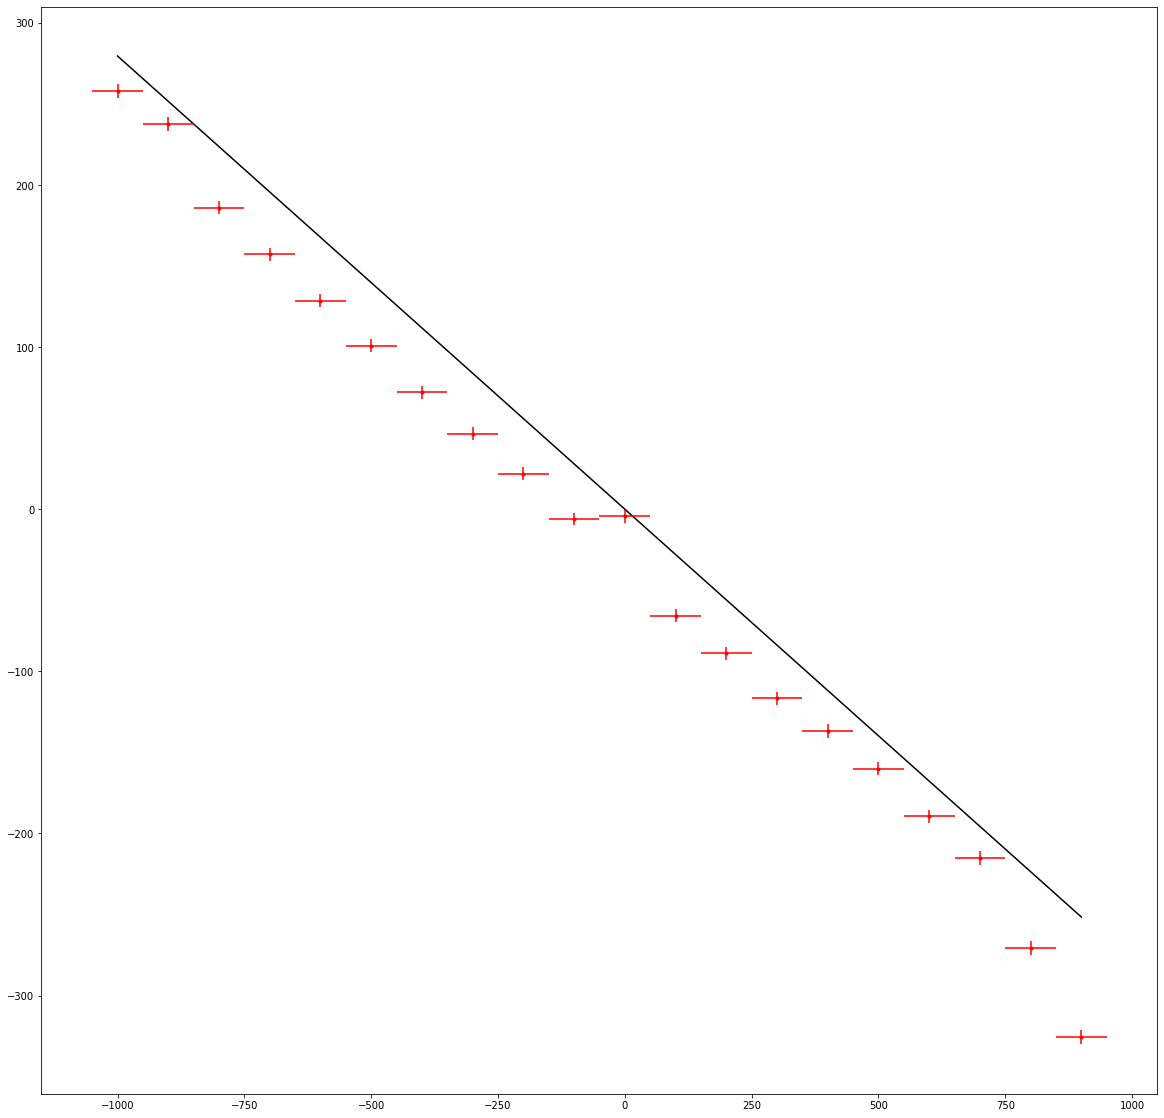

In [16]:
x = np.linspace(P.min(), P.max(), 2)
plt.figure(figsize=(20, 20))
plt.plot(x, k[0] * x, 'black')
plt.errorbar(P, del_n, xerr=sig_P, yerr=sig_del_n, fmt='.', color='red')
#tikz.save("plot2.tex")

Очистка данных

In [17]:
df = df[df.index.isin(range(2, 18))]
P = df[df.columns[0]].values + 100
P[8] = P[8] - 100
sig_P = 50
z = df[df.columns[1]].values
sig_z = 5
del_n = ((z - K[1]) / K[0]) * lam / l
sig_del_n = np.abs(del_n * (((sig_z ** 2 + err_K[1][1]) ** 0.5 / (z - K[1])) ** 2 + (err_K[0][0] ** 0.5 / K[0]) ** 2) ** 0.5)

In [18]:
k, err = sp.curve_fit(fit2, P, del_n)
for num, val in enumerate(k):
    print_err(val, err[num][num] ** 0.5)

-0.268 \pm 0.003


<ErrorbarContainer object of 3 artists>

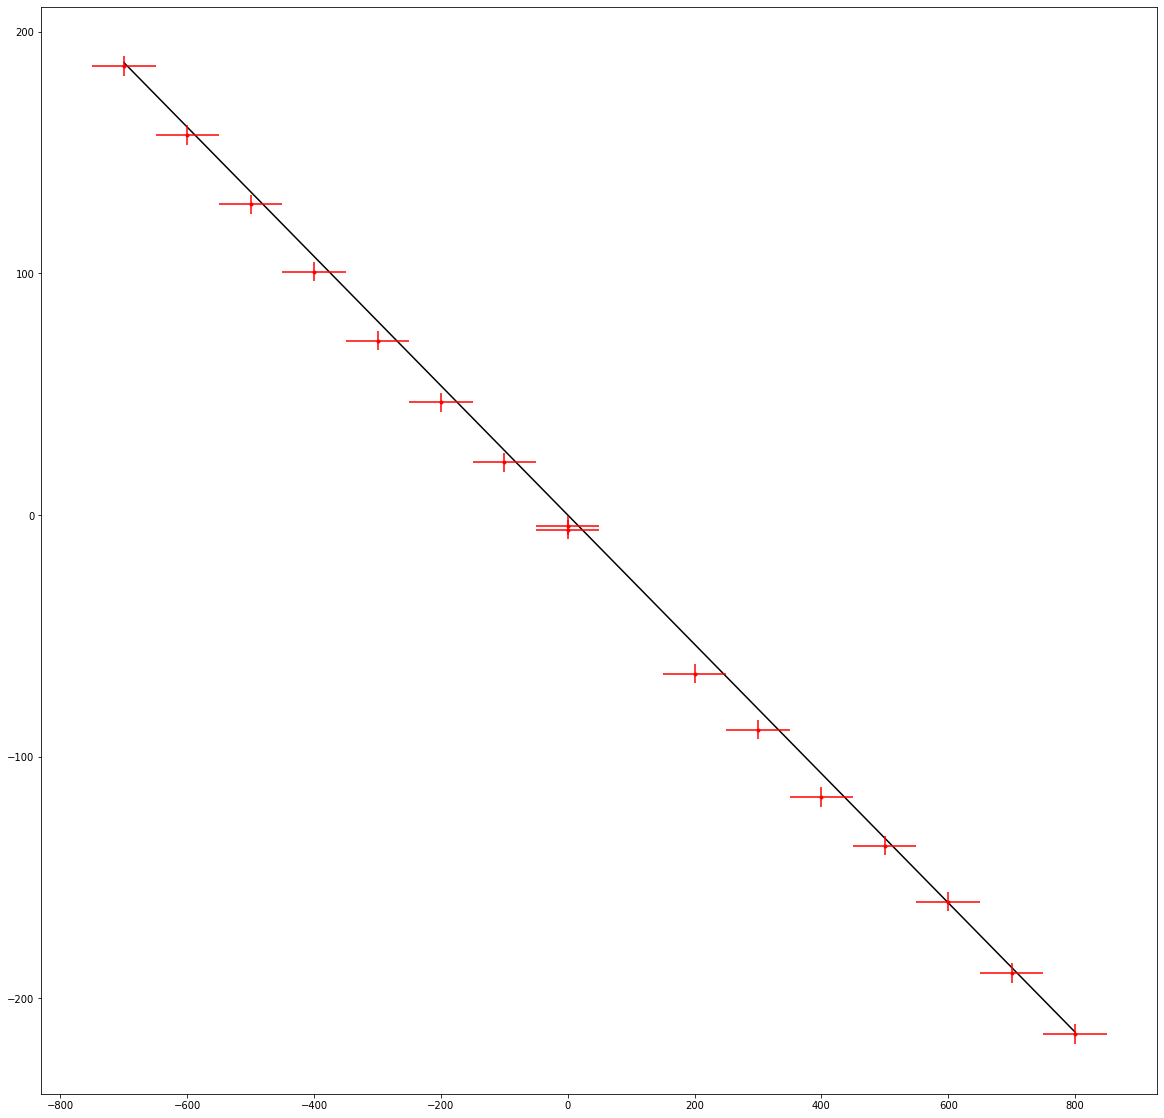

In [19]:
x = np.linspace(P.min(), P.max(), 2)
plt.figure(figsize=(20, 20))
plt.plot(x, k[0] * x, 'black')
plt.errorbar(P, del_n, xerr=sig_P, yerr=sig_del_n, fmt='.', color='red')
#tikz.save("plot3.tex")

In [20]:
alph = -(k[0] * 10 ** (-8) / (2 * np.pi) * 1.380649 * 10 ** (-23) * 300)
sig_alph = alph * err[0][0] ** 0.5 / np.abs(k[0])
print_err(alph, sig_alph)
n_air = 1 + alph / (1.380649 * 10 ** (-23) * 273.15 / (2 * np.pi)) * 10 ** 5
sig_n_air = alph / (1.380649 * 10 ** (-23) * 273.15 / (2 * np.pi)) * 10 ** 5 * sig_alph / alph
print_err(n_air, sig_n_air)

1.7640000000000002e-30 \pm 2.3e-32
1.000294 \pm 4e-06


>#### Исследование углекислого газа

In [21]:
df1 = csvtotex("../data/data.csv", "../data/table3_1.tex", (6, 7), range(0, 7), transp=True)
df2 = csvtotex("../data/data.csv", "../data/table3_2.tex", (6, 7), range(7, 14), transp=True)
df3 = csvtotex("../data/data.csv", "../data/table3_3.tex", (6, 7), range(14, 21), transp=True)
df = pd.concat([df1, df2, df3], axis=1, join="inner")
display(df)
df = df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
"$t$, мин",0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
"$z $, дел",2494,2394,2185,2110,2033,1975,1913,1829,1782,1745,...,1664,1633,1603,1583,1552,1533,1514,1492,1477,1459


In [22]:
t = df[df.columns[0]].values
z = df[df.columns[1]].values
sig_t = 5 / 60
sig_z = 5

In [23]:
def fit4(x, p0, p1):
    return p0 * np.exp(x * p1)

In [24]:
k, err = sp.curve_fit(fit4, t, z)
for num, val in enumerate(k):
    print_err(val, err[num][num] ** 0.5)

2318.103 \pm 37.211
-0.027 \pm 0.0016


<ErrorbarContainer object of 3 artists>

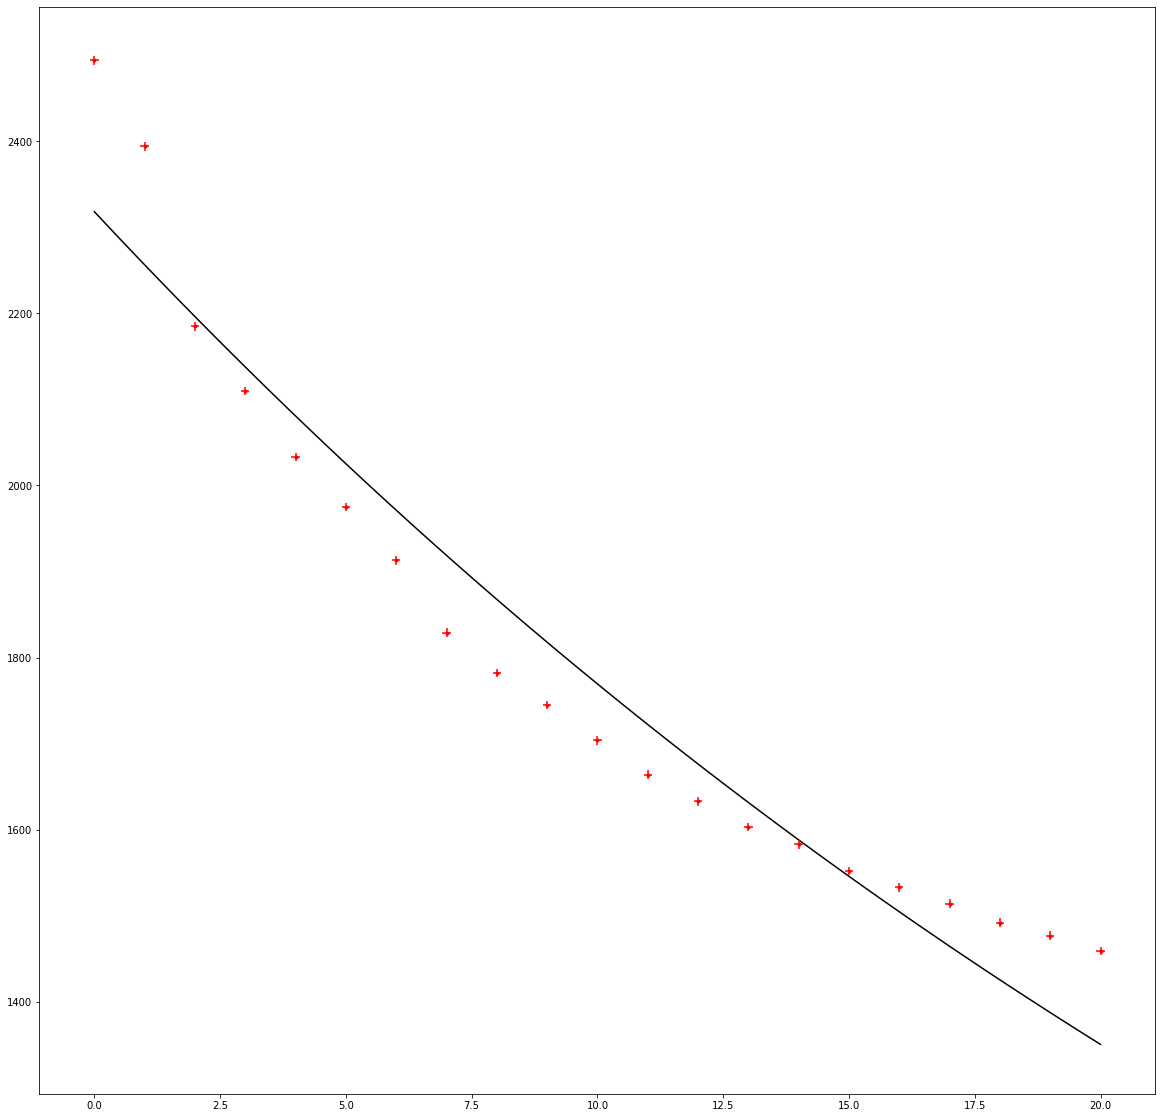

In [25]:
x = np.linspace(t.min(), t.max(), 100)
plt.figure(figsize=(20,20))
plt.plot(x, fit4(x, k[0], k[1]), 'black')
plt.errorbar(t, z, xerr=sig_t, yerr=sig_z, fmt='.', color='red')
#tikz.save("plot4.tex")

In [26]:
#df = df[df.index.isin(range(1, 20))]

In [27]:
t = df[df.columns[0]].values
z = df[df.columns[1]].values
sig_t = 5 / 60
sig_z = 5

In [28]:
def fit3(x, p0, p1):
    return p0 * x + p1

In [29]:
k, err = sp.curve_fit(fit3, t, np.log(z))
for num, val in enumerate(k):
    print_err(val, err[num][num] ** 0.5)

-0.0251 \pm 0.0015
7.731 \pm 0.017


<ErrorbarContainer object of 3 artists>

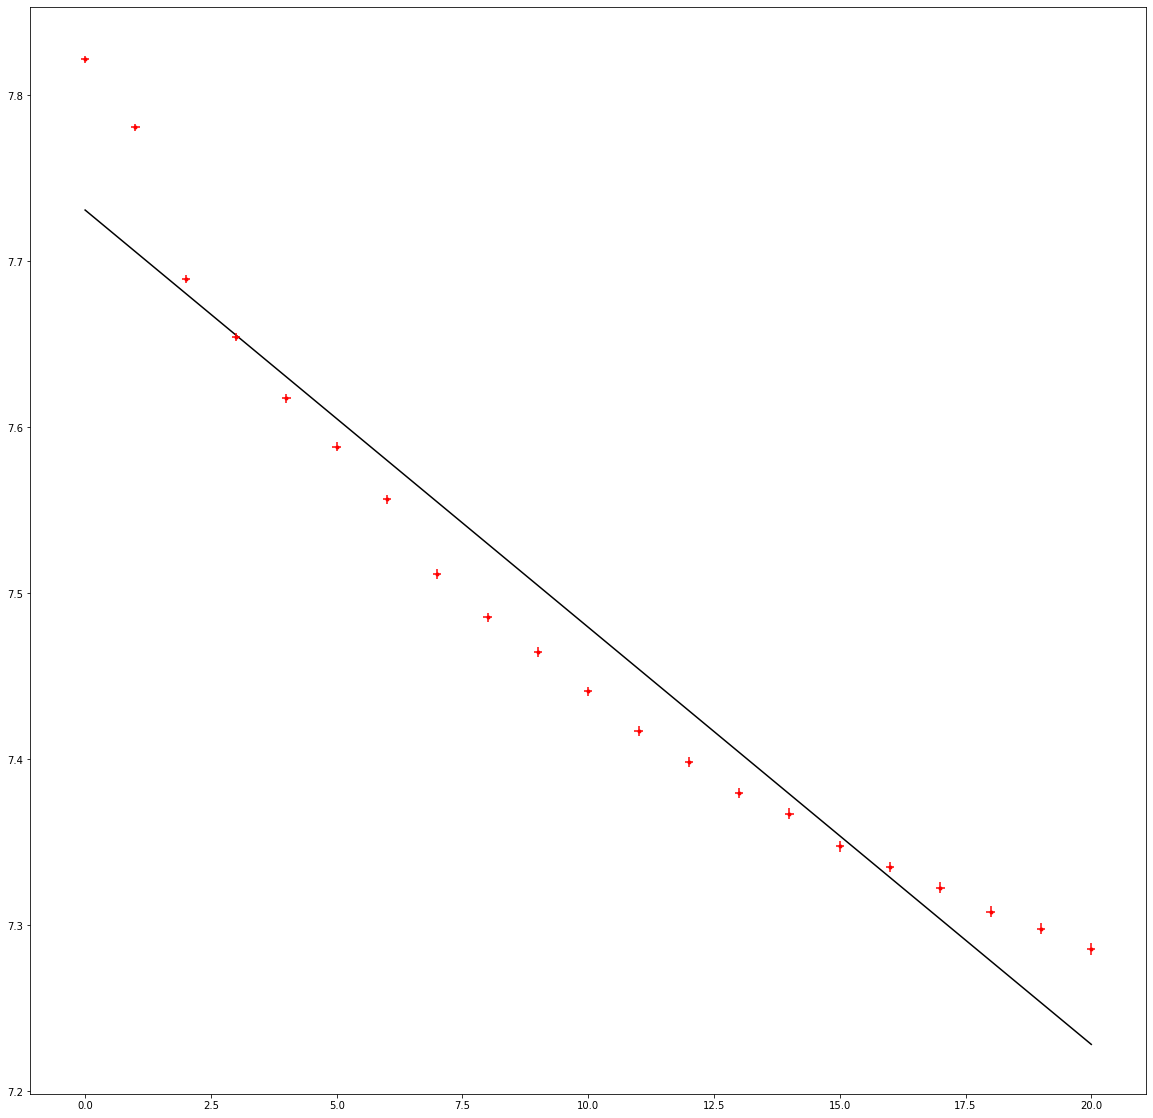

In [30]:
x = np.linspace(t.min(), t.max(), 100)
plt.figure(figsize=(20,20))
plt.plot(x, fit3(x, k[0], k[1]), 'black')
plt.errorbar(t, np.log(z), xerr=sig_t, yerr=sig_z/z, fmt='.', color='red')
#tikz.save("plot5.tex")

In [31]:
n_carb = n_air + (z[0] - K[1]) / K[0] * lam * 10 ** (-9) / (l * 10 ** (-2))
sig_n_carb = ((sig_n_air) ** 2 + (sig_z / K[0] * lam * 10 ** (-9) / (l * 10 ** (-2))) ** 2 +
(err_K[1][1] ** 0.5 / K[0] * lam * 10 ** (-9) / (l * 10 ** (-2))) ** 2 +
(err_K[0][0] ** 0.5 / (z[0] - K[1]) / K[0] ** 2 * lam * 10 ** (-9) / (l * 10 ** (-2)))) ** 0.5
print_err(n_carb, sig_n_carb)

1.000465 \pm 4e-06


>#### Оценка возможностей компенсатора

In [32]:
del_n_min = sig_z / K[0]
print(del_n_min)
del_n_max = 3000 / K[0]
print(del_n_max)

0.1443894389435885
86.6336633661531
